Import libraries

In [19]:
#Core libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modules for test atributes of ML modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

#ML modules
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb 

Reading dataset

In [3]:
dataset_name_file = '/home/user/Desktop/high_diamond_ranked_10min.csv'
dataset_df = pd.read_csv(dataset_name_file)
dataset_df = dataset_df.drop(columns=['gameId'])
dataset_df.head(8).T

,0,1,2,3,4,5,6,7
blueWins,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
blueWardsPlaced,28.0,12.0,15.0,43.0,75.0,18.0,18.0,16.0
blueWardsDestroyed,2.0,1.0,0.0,1.0,4.0,0.0,3.0,2.0
blueFirstBlood,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
blueKills,9.0,5.0,7.0,4.0,6.0,5.0,7.0,5.0
blueDeaths,6.0,5.0,11.0,5.0,6.0,3.0,6.0,13.0
blueAssists,11.0,5.0,4.0,5.0,6.0,6.0,7.0,3.0
blueEliteMonsters,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
blueDragons,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
blueHeralds,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
dataset_df.describe().T

,count,mean,std,min,25%,50%,75%,max
blueWins,9879.0,0.499038,0.500024,0.0,0.00,0.0,1.00,1.0
blueWardsPlaced,9879.0,22.288288,18.019177,5.0,14.00,16.0,20.00,250.0
blueWardsDestroyed,9879.0,2.824881,2.174998,0.0,1.00,3.0,4.00,27.0
blueFirstBlood,9879.0,0.504808,0.500002,0.0,0.00,1.0,1.00,1.0
blueKills,9879.0,6.183925,3.011028,0.0,4.00,6.0,8.00,22.0
blueDeaths,9879.0,6.137666,2.933818,0.0,4.00,6.0,8.00,22.0
blueAssists,9879.0,6.645106,4.064520,0.0,4.00,6.0,9.00,29.0
blueEliteMonsters,9879.0,0.549954,0.625527,0.0,0.00,0.0,1.00,2.0
blueDragons,9879.0,0.361980,0.480597,0.0,0.00,0.0,1.00,1.0
blueHeralds,9879.0,0.187974,0.390712,0.0,0.00,0.0,0.00,1.0


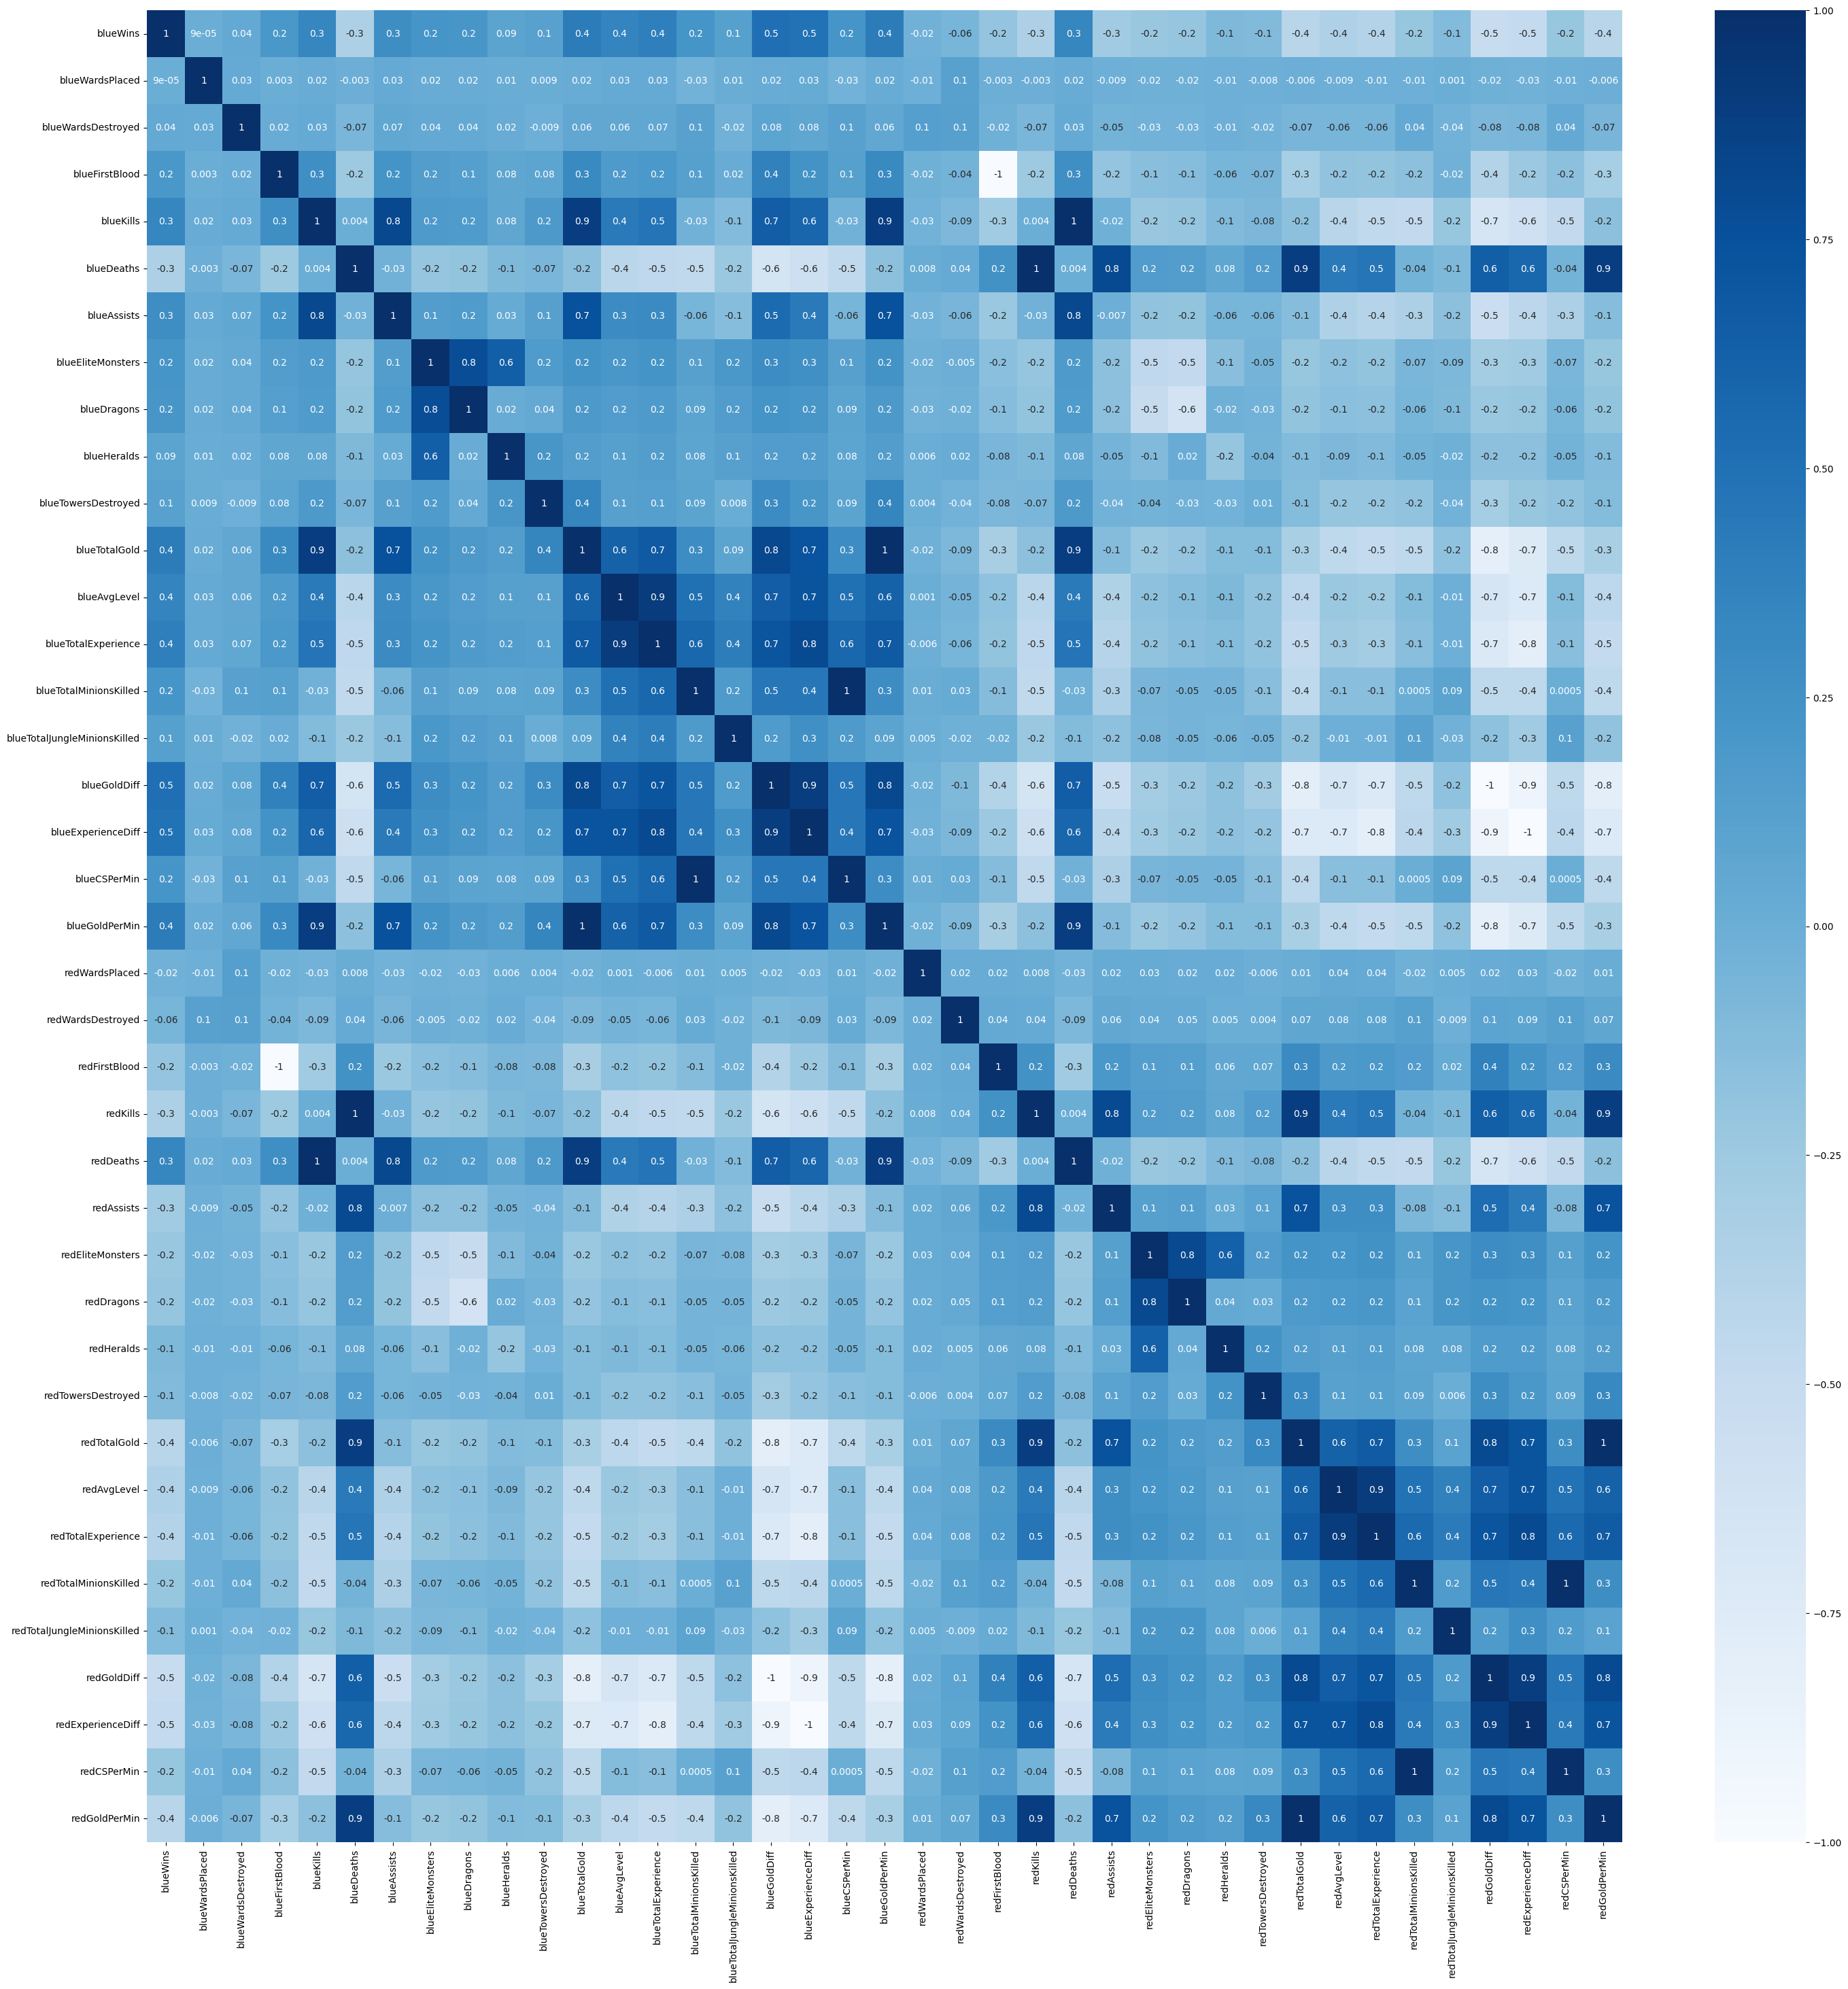

In [5]:
"""
0.1 to 0.3   -> Weak linear relationship
0.3 to 0.5 	 -> Moderate linear relationship
0.5 to 0.7 	 -> Strong linear relationship
0.7 to 1.0 	 -> Very strong linear relationship
0            -> No linear relationship
-0.1 to -0.3 -> Weak negative linear relationship
-0.3 to -0.5 -> Moderate negative linear relationship
-0.5 to -0.7 -> Strong negative linear relationship
-0.7 to -1.0 -> Very strong negative linear relationship
"""
plt.figure(figsize=(35,35))
corr = dataset_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

Creating new columns with difference between same features of teams

In [6]:
blueWardsPlacedDiff = dataset_df['blueWardsPlaced'] - dataset_df['redWardsPlaced']
blueWardsDestroyedDiff = dataset_df['blueWardsDestroyed'] - dataset_df['redWardsDestroyed']
blueKillsDiff = dataset_df['blueKills'] - dataset_df['redKills']
blueDeathsDiff = dataset_df['blueDeaths'] - dataset_df['redDeaths']
blueAssistsDiff = dataset_df['blueAssists'] - dataset_df['redAssists']
blueEliteMonstersDiff = dataset_df['blueEliteMonsters'] - dataset_df['redEliteMonsters']
blueDragonsDiff = dataset_df['blueDragons'] - dataset_df['redDragons']
blueHeraldsDiff = dataset_df['blueHeralds'] - dataset_df['redHeralds']
blueTowersDestroyedDiff = dataset_df['blueTowersDestroyed'] - dataset_df['redTowersDestroyed']
blueAvgLevelDiff = dataset_df['blueAvgLevel'] - dataset_df['redAvgLevel']
blueTotalExperienceDiff = dataset_df['blueTotalExperience'] - dataset_df['redTotalExperience']
blueTotalMinionsKilledDiff = dataset_df['blueTotalMinionsKilled'] - dataset_df['redTotalMinionsKilled']
blueTotalJungleMinionsKilledDiff = dataset_df['blueTotalJungleMinionsKilled'] - dataset_df['redTotalJungleMinionsKilled']
blueCSPerMinDiff = dataset_df['blueCSPerMin'] - dataset_df['redCSPerMin']
blueGoldPerMinDiff = dataset_df['blueGoldPerMin'] - dataset_df['redGoldPerMin']

dataset_df['blueWardsPlacedDiff'] = blueWardsPlacedDiff
dataset_df['blueWardsDestroyedDiff'] = blueWardsDestroyedDiff
dataset_df['blueKillsDiff'] = blueKillsDiff
dataset_df['blueDeathsDiff'] = blueDeathsDiff
dataset_df['blueAssistsDiff'] = blueAssistsDiff
dataset_df['blueEliteMonstersDiff'] = blueEliteMonstersDiff
dataset_df['blueDragonsDiff'] = blueDragonsDiff
dataset_df['blueHeraldsDiff'] = blueHeraldsDiff
dataset_df['blueTowersDestroyedDiff'] = blueTowersDestroyedDiff
dataset_df['blueAvgLevelDiff'] = blueAvgLevelDiff
dataset_df['blueTotalExperienceDiff'] = blueTotalExperienceDiff
dataset_df['blueTotalMinionsKilledDiff'] = blueTotalMinionsKilledDiff
dataset_df['blueTotalJungleMinionsKilledDiff'] = blueTotalJungleMinionsKilledDiff
dataset_df['blueCSPerMinDiff'] = blueCSPerMinDiff
dataset_df['blueGoldPerMinDiff'] = blueGoldPerMinDiff

removing columns with redundant information

In [7]:
dataset_df = dataset_df.drop(columns=['redKills', 'redDeaths', 'redFirstBlood', 'redExperienceDiff', 'redGoldDiff'])

In [8]:
list(dataset_df.columns)

['blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin',
 'redWardsPlaced',
 'redWardsDestroyed',
 'redAssists',
 'redEliteMonsters',
 'redDragons',
 'redHeralds',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redCSPerMin',
 'redGoldPerMin',
 'blueWardsPlacedDiff',
 'blueWardsDestroyedDiff',
 'blueKillsDiff',
 'blueDeathsDiff',
 'blueAssistsDiff',
 'blueEliteMonstersDiff',
 'blueDragonsDiff',
 'blueHeraldsDiff',
 'blueTowersDestroyedDiff',
 'blueAvgLevelDiff',
 'blueTotalExperienceDiff',
 'blueTotalMinionsKilledDiff',
 'blueTotalJungleMinionsKilledDiff',
 'blueCSPe

verifying new correlations

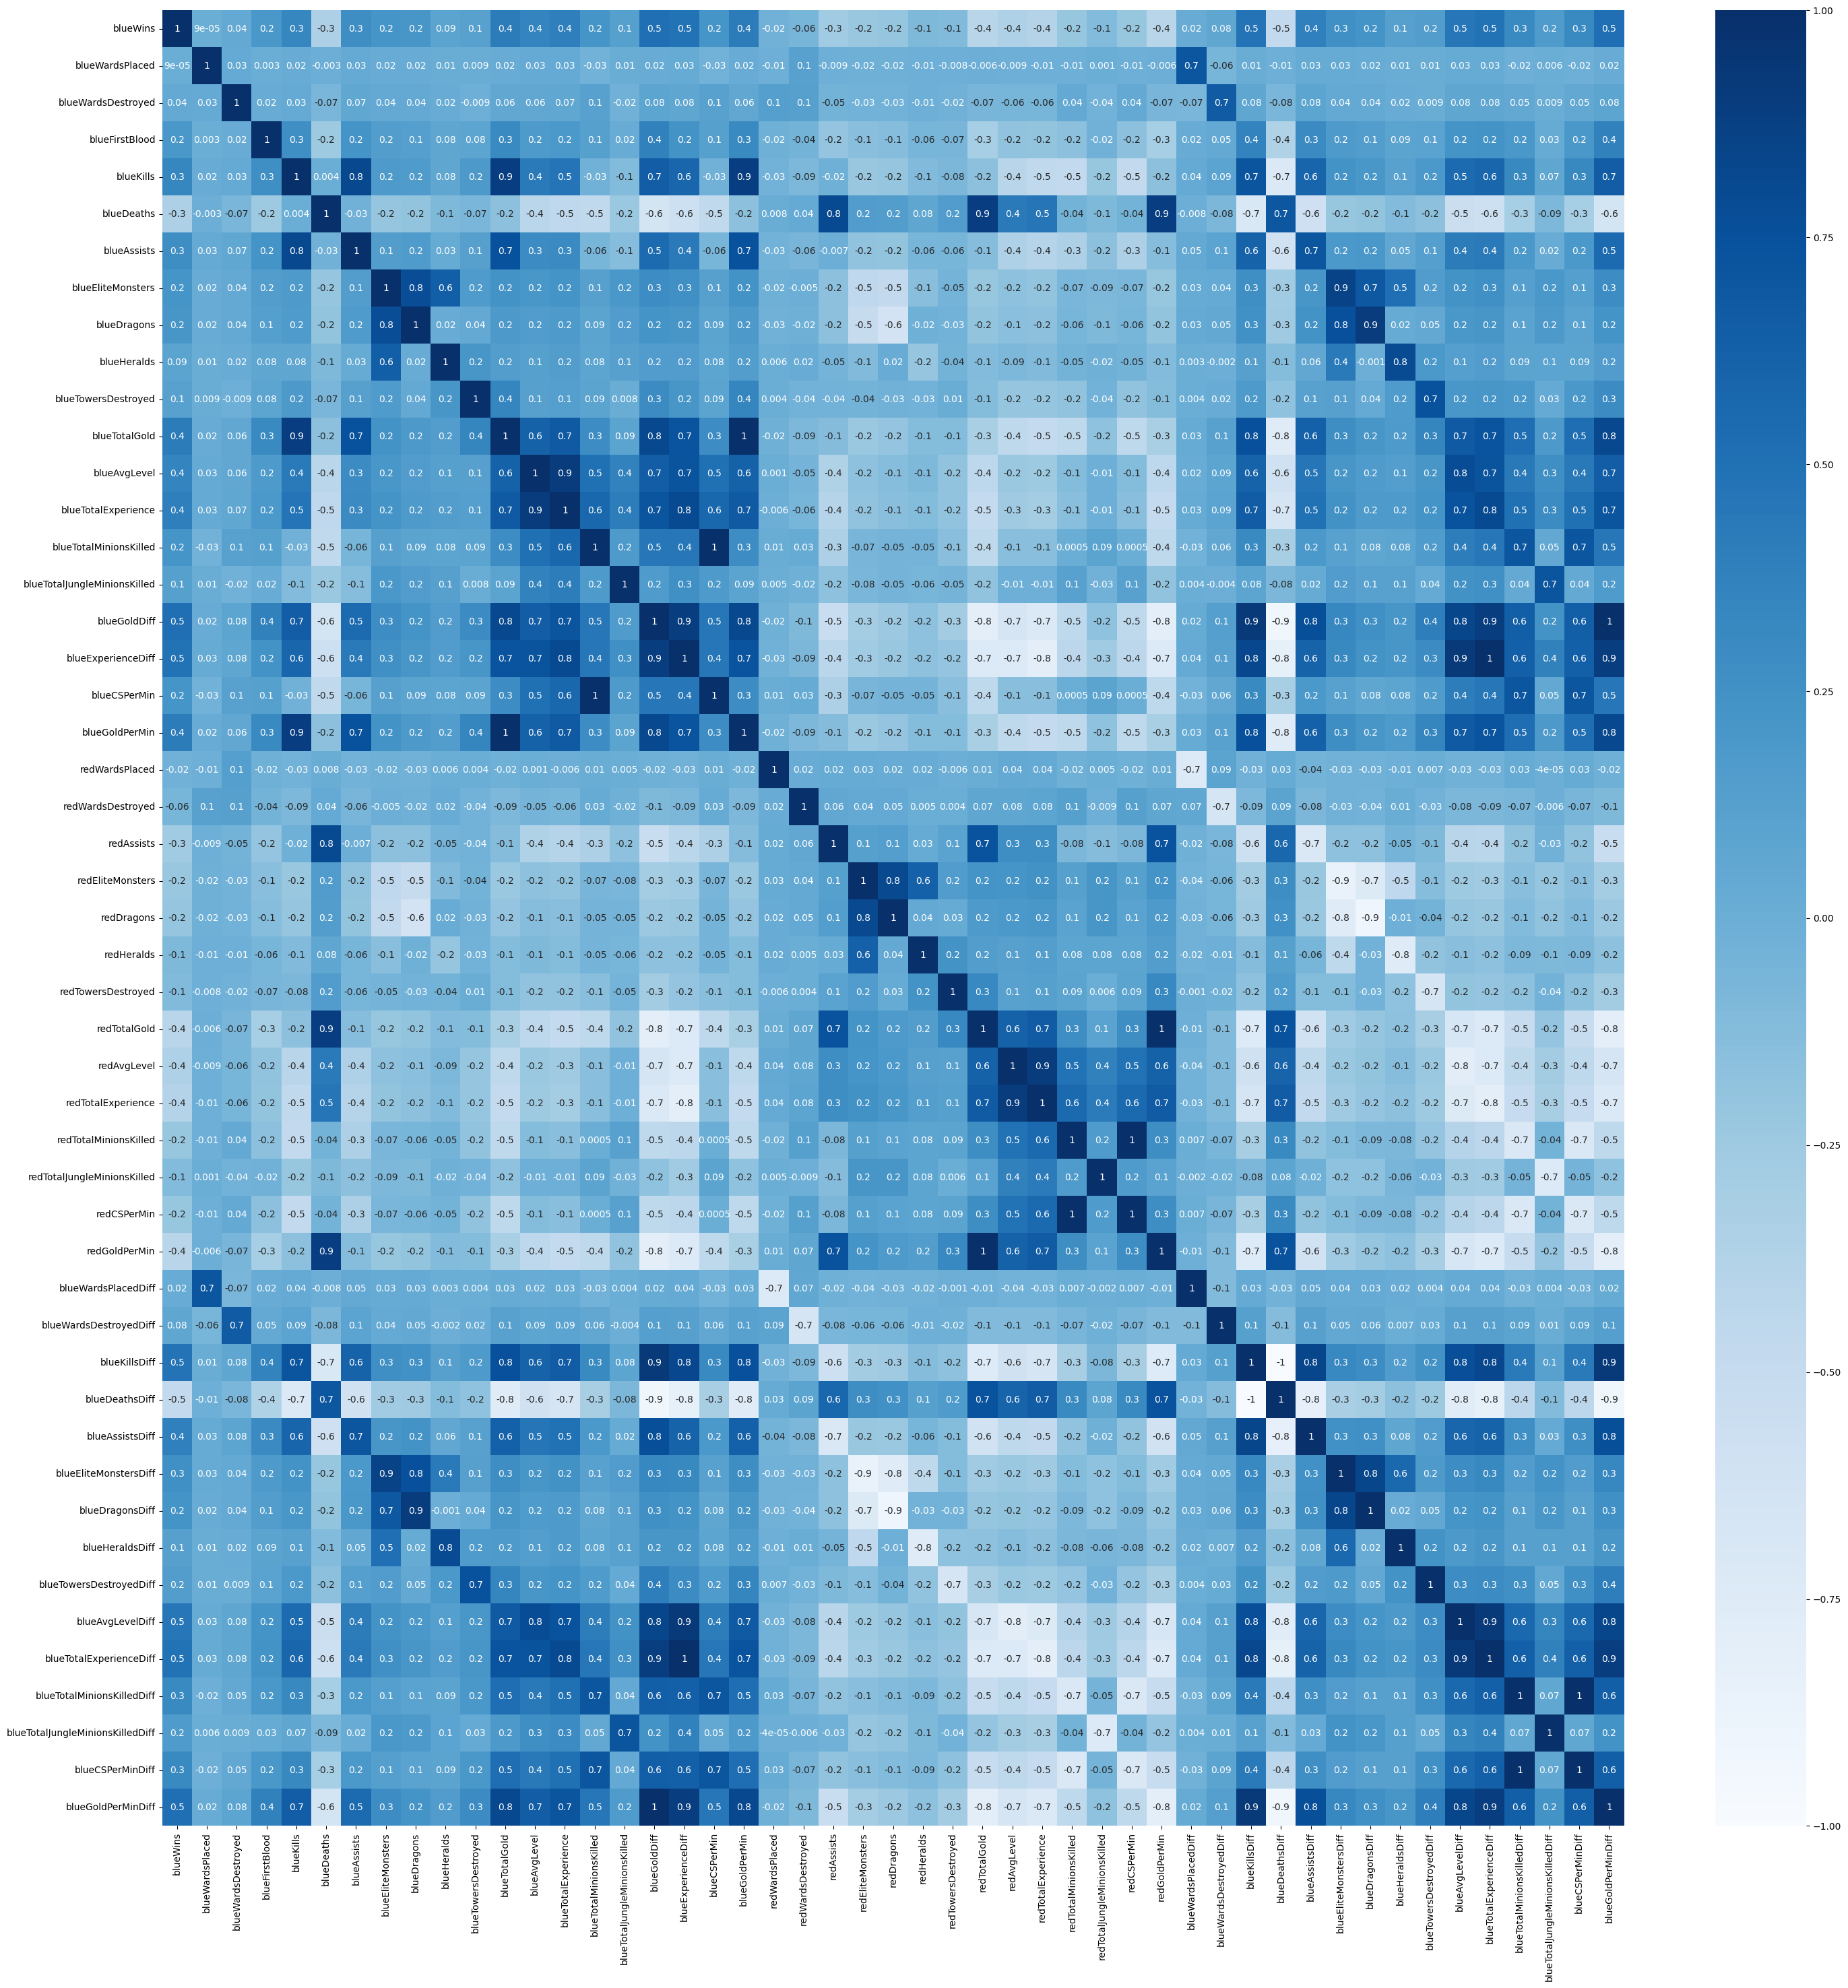

In [9]:
plt.figure(figsize=(35,35))
corr = dataset_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

plotting graphics of variables distribution

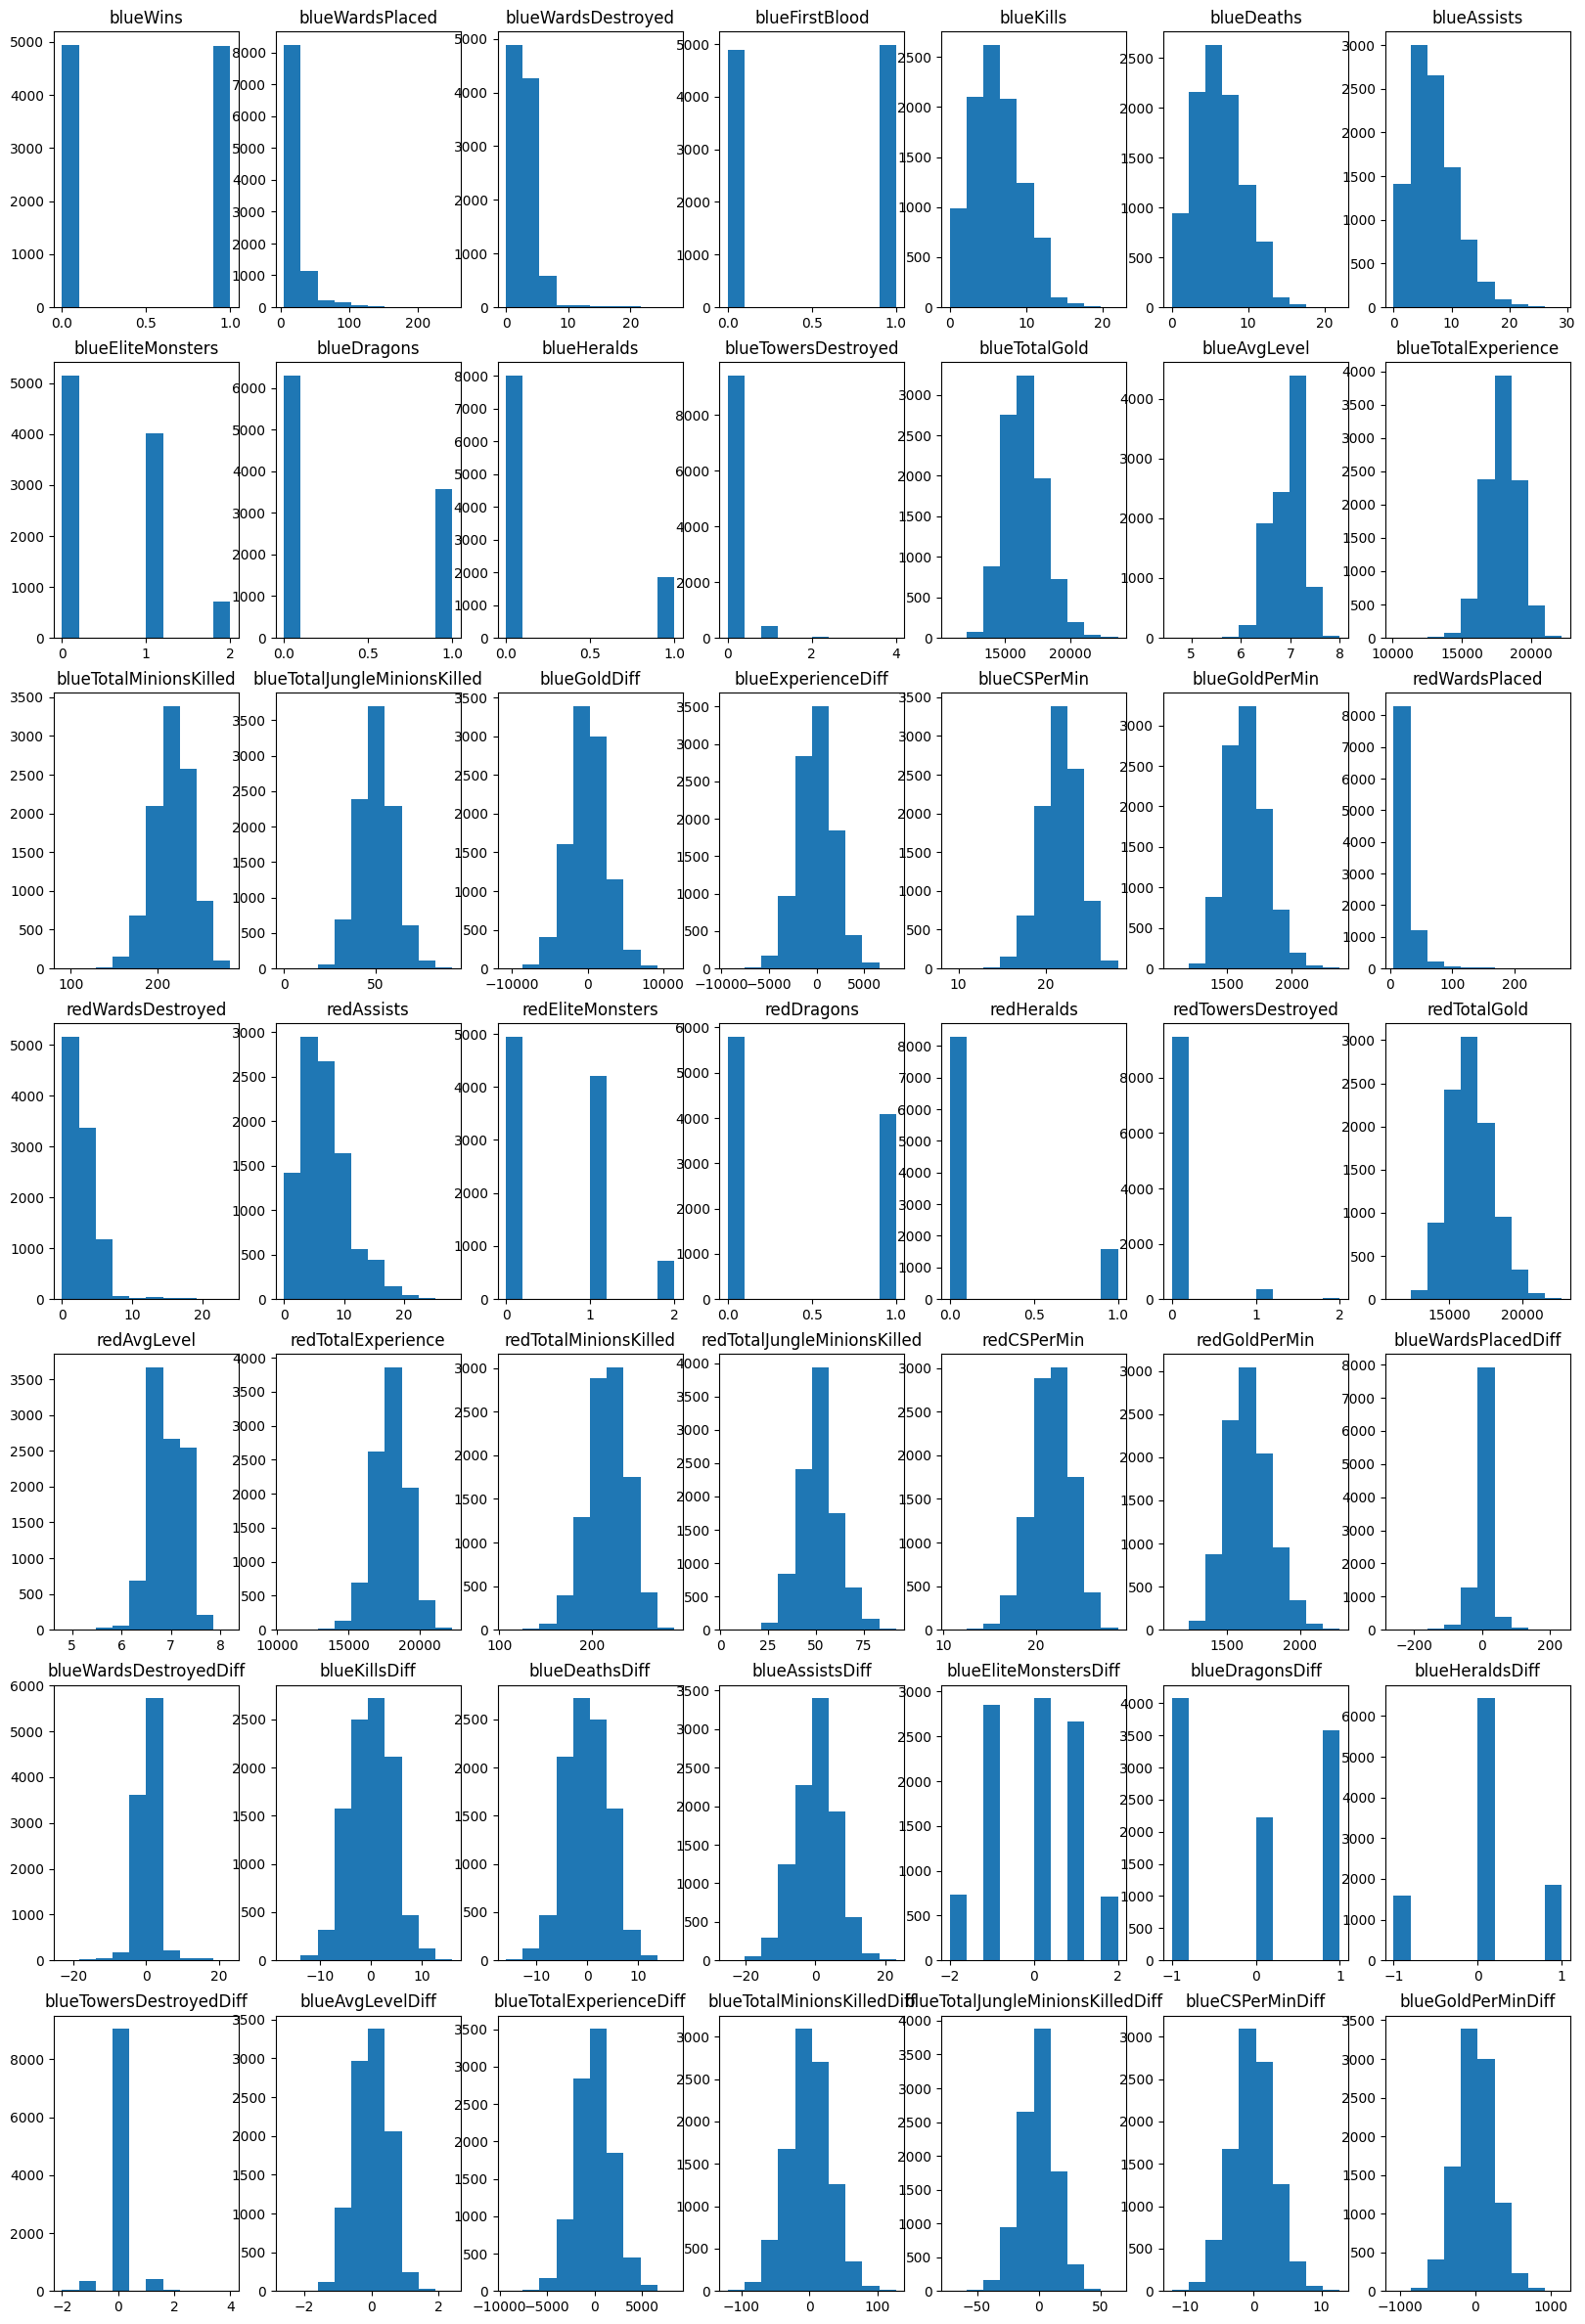

In [10]:
plt.figure(figsize=(20, 30))
for idx, col in enumerate(list(dataset_df.columns)):
    plt.subplot(7, 7, idx+1)
    plt.title(col)
    plt.hist(dataset_df[col])

Cleaning dataset based on statistics from describe function from pandas

In [11]:
dataset_df.describe().T

,count,mean,std,min,25%,50%,75%,max
blueWins,9879.0,0.499038,0.500024,0.0,0.00,0.0,1.00,1.0
blueWardsPlaced,9879.0,22.288288,18.019177,5.0,14.00,16.0,20.00,250.0
blueWardsDestroyed,9879.0,2.824881,2.174998,0.0,1.00,3.0,4.00,27.0
blueFirstBlood,9879.0,0.504808,0.500002,0.0,0.00,1.0,1.00,1.0
blueKills,9879.0,6.183925,3.011028,0.0,4.00,6.0,8.00,22.0
blueDeaths,9879.0,6.137666,2.933818,0.0,4.00,6.0,8.00,22.0
blueAssists,9879.0,6.645106,4.064520,0.0,4.00,6.0,9.00,29.0
blueEliteMonsters,9879.0,0.549954,0.625527,0.0,0.00,0.0,1.00,2.0
blueDragons,9879.0,0.361980,0.480597,0.0,0.00,0.0,1.00,1.0
blueHeralds,9879.0,0.187974,0.390712,0.0,0.00,0.0,0.00,1.0


In [12]:

filter_bluewards = dataset_df['blueWardsPlaced'] <= 25
data_df = dataset_df[filter_bluewards]
filter_bluewards = dataset_df['blueWardsPlaced'] >= 10
data_df = dataset_df[filter_bluewards]

filter_blueWardsDestroyed = dataset_df['blueWardsPlaced'] <= 5
data_df = dataset_df[filter_bluewards]
filter_blueWardsDestroyed = dataset_df['blueWardsPlaced'] >= 1
data_df = dataset_df[filter_bluewards]

filter_blueTotalGold = dataset_df['blueTotalGold'] <= 19000
data_df = dataset_df[filter_blueTotalGold]
filter_blueTotalGold = dataset_df['blueTotalGold'] >= 14000
data_df = dataset_df[filter_blueTotalGold]

filter_blueKills = dataset_df['blueKills'] <= 9
data_df = dataset_df[filter_bluewards]
filter_blueKills = dataset_df['blueKills'] >= 3
data_df = dataset_df[filter_bluewards]

filter_blueDeaths = dataset_df['blueDeaths'] <= 9
data_df = dataset_df[filter_blueDeaths]
filter_blueDeaths = dataset_df['blueDeaths'] >= 3
data_df = dataset_df[filter_blueDeaths]

filter_blueAssists = dataset_df['blueAssists'] <= 10
data_df = dataset_df[filter_blueAssists]
filter_blueAssists = dataset_df['blueAssists'] >= 2
data_df = dataset_df[filter_blueAssists]

filter_blueEliteMonsters = dataset_df['blueEliteMonsters'] >= 1
data_df = dataset_df[filter_blueEliteMonsters]

filter_blueDragons = dataset_df['blueDragons'] <= 1
data_df = dataset_df[filter_blueDragons]

filter_blueHeralds = dataset_df['blueHeralds'] == 0
data_df = dataset_df[filter_blueHeralds]

filter_blueTowersDestroyed = dataset_df['blueTowersDestroyed'] == 0
data_df = dataset_df[filter_blueTowersDestroyed]

filter_blueAvgLevel = dataset_df['blueAvgLevel'] <= 7.3
data_df = dataset_df[filter_blueAvgLevel]
filter_blueAvgLevel = dataset_df['blueAvgLevel'] >= 6.7
data_df = dataset_df[filter_blueAvgLevel]

filter_blueTotalExperience = dataset_df['blueTotalExperience'] <= 19000
data_df = dataset_df[filter_blueTotalExperience]
filter_blueTotalExperience = dataset_df['blueTotalExperience'] >= 15000
data_df = dataset_df[filter_blueTotalExperience]

filter_blueTotalMinionsKilled = dataset_df['blueTotalMinionsKilled'] <= 240
data_df = dataset_df[filter_blueTotalExperience]
filter_blueTotalMinionsKilled = dataset_df['blueTotalMinionsKilled'] >= 200
data_df = dataset_df[filter_blueTotalExperience]

filter_blueTotalJungleMinionsKilled = dataset_df['blueTotalJungleMinionsKilled'] <= 60
data_df = dataset_df[filter_blueTotalExperience]
filter_blueTotalJungleMinionsKilled = dataset_df['blueTotalJungleMinionsKilled'] >= 40
data_df = dataset_df[filter_blueTotalExperience]

filter_blueGoldDiff = dataset_df['blueGoldDiff'] <= 24000
data_df = dataset_df[filter_blueGoldDiff]
filter_blueGoldDiff = dataset_df['blueGoldDiff'] >= -2400
data_df = dataset_df[filter_blueGoldDiff]

filter_blueGoldDiff = dataset_df['blueExperienceDiff'] <= 2000
data_df = dataset_df[filter_blueGoldDiff]
filter_blueGoldDiff = dataset_df['blueExperienceDiff'] >= -2000
data_df = dataset_df[filter_blueGoldDiff]

filter_blueCSPerMin = dataset_df['blueCSPerMin'] <= 26
data_df = dataset_df[filter_blueCSPerMin]
filter_blueCSPerMin = dataset_df['blueCSPerMin'] >= 17
data_df = dataset_df[filter_blueCSPerMin]

filter_blueGoldPerMin = dataset_df['blueGoldPerMin'] <= 1800
data_df = dataset_df[filter_blueGoldPerMin]
filter_blueGoldPerMin = dataset_df['blueGoldPerMin'] >= 1500
data_df = dataset_df[filter_blueGoldPerMin]

filter_redWardsPlaced = dataset_df['redWardsPlaced'] <= 40
data_df = dataset_df[filter_redWardsPlaced]

filter_redWardsDestroyed = dataset_df['redWardsDestroyed'] <= 5
data_df = dataset_df[filter_redWardsDestroyed]

filter_redAssists = dataset_df['redAssists'] <= 9
data_df = dataset_df[filter_redAssists]

filter_redEliteMonsters = dataset_df['redEliteMonsters'] < 2
data_df = dataset_df[filter_redEliteMonsters]

filter_redDragons = dataset_df['redDragons'] < 2
data_df = dataset_df[filter_redDragons]

filter_redHeralds = dataset_df['redHeralds'] == 0
data_df = dataset_df[filter_redHeralds]

filter_redTowersDestroyed = dataset_df['redTowersDestroyed'] == 0
data_df = dataset_df[filter_redTowersDestroyed]

filter_redTotalGold = dataset_df['redTotalGold'] <= 19000
data_df = dataset_df[filter_redTowersDestroyed]
filter_redTotalGold = dataset_df['redTotalGold'] >= 14000
data_df = dataset_df[filter_redTowersDestroyed]

filter_redAvgLevel = dataset_df['redAvgLevel'] <= 8
data_df = dataset_df[filter_redAvgLevel]
filter_redAvgLevel = dataset_df['redAvgLevel'] >= 6
data_df = dataset_df[filter_redAvgLevel]

filter_redTotalExperience = dataset_df['redTotalExperience'] <= 19000
data_df = dataset_df[filter_redTotalExperience]
filter_redTotalExperience = dataset_df['redTotalExperience'] >= 17000
data_df = dataset_df[filter_redTotalExperience]

filter_redTotalMinionsKilled = dataset_df['redTotalMinionsKilled'] <= 250
data_df = dataset_df[filter_redTotalMinionsKilled]
filter_redTotalMinionsKilled = dataset_df['redTotalMinionsKilled'] >= 190
data_df = dataset_df[filter_redTotalMinionsKilled]

filter_redTotalJungleMinionsKilled = dataset_df['redTotalJungleMinionsKilled'] <= 70
data_df = dataset_df[filter_redTotalJungleMinionsKilled]
filter_redTotalJungleMinionsKilled = dataset_df['redTotalJungleMinionsKilled'] >= 40
data_df = dataset_df[filter_redTotalJungleMinionsKilled]

filter_redCSPerMin = dataset_df['redCSPerMin'] <= 25
data_df = dataset_df[filter_redCSPerMin]
filter_redCSPerMin = dataset_df['redCSPerMin'] >= 19
data_df = dataset_df[filter_redCSPerMin]

filter_redGoldPerMin = dataset_df['redGoldPerMin'] <= 1800
data_df = dataset_df[filter_redCSPerMin]
filter_redGoldPerMin = dataset_df['redGoldPerMin'] >= 1500
data_df = dataset_df[filter_redCSPerMin]

filter_blueWardsPlacedDiff = dataset_df['blueWardsPlacedDiff'] <= 25
data_df = dataset_df[filter_blueWardsPlacedDiff]
filter_blueWardsPlacedDiff = dataset_df['blueWardsPlacedDiff'] >= -25
data_df = dataset_df[filter_blueWardsPlacedDiff]

filter_blueWardsDestroyedDiff = dataset_df['blueWardsDestroyedDiff'] <= 4
data_df = dataset_df[filter_blueWardsDestroyedDiff]
filter_blueWardsDestroyedDiff = dataset_df['blueWardsDestroyedDiff'] >= -4
data_df = dataset_df[filter_blueWardsDestroyedDiff]

filter_blueKillsDiff = dataset_df['blueKillsDiff'] <= 7
data_df = dataset_df[filter_blueKillsDiff]
filter_blueKillsDiff = dataset_df['blueKillsDiff'] >= -7
data_df = dataset_df[filter_blueKillsDiff]

filter_blueDeathsDiff = dataset_df['blueDeathsDiff'] <= 7
data_df = dataset_df[filter_blueDeathsDiff]
filter_blueDeathsDiff = dataset_df['blueDeathsDiff'] >= -7
data_df = dataset_df[filter_blueDeathsDiff]

filter_blueAssistsDiff = dataset_df['blueAssistsDiff'] <= 10
data_df = dataset_df[filter_blueAssistsDiff]
filter_blueAssistsDiff = dataset_df['blueAssistsDiff'] >= -10
data_df = dataset_df[filter_blueAssistsDiff]

filter_blueTowersDestroyedDiff = dataset_df['blueTowersDestroyedDiff'] <= 2
data_df = dataset_df[filter_blueTowersDestroyedDiff]
filter_blueTowersDestroyedDiff = dataset_df['blueTowersDestroyedDiff'] >= -2
data_df = dataset_df[filter_blueTowersDestroyedDiff]

filter_blueAvgLevelDiff = dataset_df['blueAvgLevelDiff'] <= 1.5
data_df = dataset_df[filter_blueAvgLevelDiff]
filter_blueAvgLevelDiff = dataset_df['blueAvgLevelDiff'] >= -1.5
data_df = dataset_df[filter_blueAvgLevelDiff]

filter_blueTotalExperienceDiff = dataset_df['blueTotalExperienceDiff'] <= 4000
data_df = dataset_df[filter_blueTotalExperienceDiff]
filter_blueTotalExperienceDiff = dataset_df['blueTotalExperienceDiff'] >= -4000
data_df = dataset_df[filter_blueTotalExperienceDiff]

filter_blueTotalMinionsKilledDiff = dataset_df['blueTotalMinionsKilledDiff'] <= 60
data_df = dataset_df[filter_blueTotalMinionsKilledDiff]
filter_blueTotalMinionsKilledDiff = dataset_df['blueTotalMinionsKilledDiff'] >= -60
data_df = dataset_df[filter_blueTotalMinionsKilledDiff]

filter_blueTotalJungleMinionsKilledDiff = dataset_df['blueTotalJungleMinionsKilledDiff'] <= 26
data_df = dataset_df[filter_blueTotalJungleMinionsKilledDiff]
filter_blueTotalJungleMinionsKilledDiff = dataset_df['blueTotalJungleMinionsKilledDiff'] >= -30
data_df = dataset_df[filter_blueTotalJungleMinionsKilledDiff]

filter_blueCSPerMinDiff = dataset_df['blueCSPerMinDiff'] <= 7
data_df = dataset_df[filter_blueCSPerMinDiff]
filter_blueCSPerMinDiff = dataset_df['blueCSPerMinDiff'] >= -7
data_df = dataset_df[filter_blueCSPerMinDiff]

filter_blueGoldPerMinDiff = dataset_df['blueGoldPerMinDiff'] <= 420
data_df = dataset_df[filter_blueGoldPerMinDiff]
filter_blueGoldPerMinDiff = dataset_df['blueGoldPerMinDiff'] >= -420
data_df = dataset_df[filter_blueGoldPerMinDiff]

plotting graphics of variables distribution after remove outliers

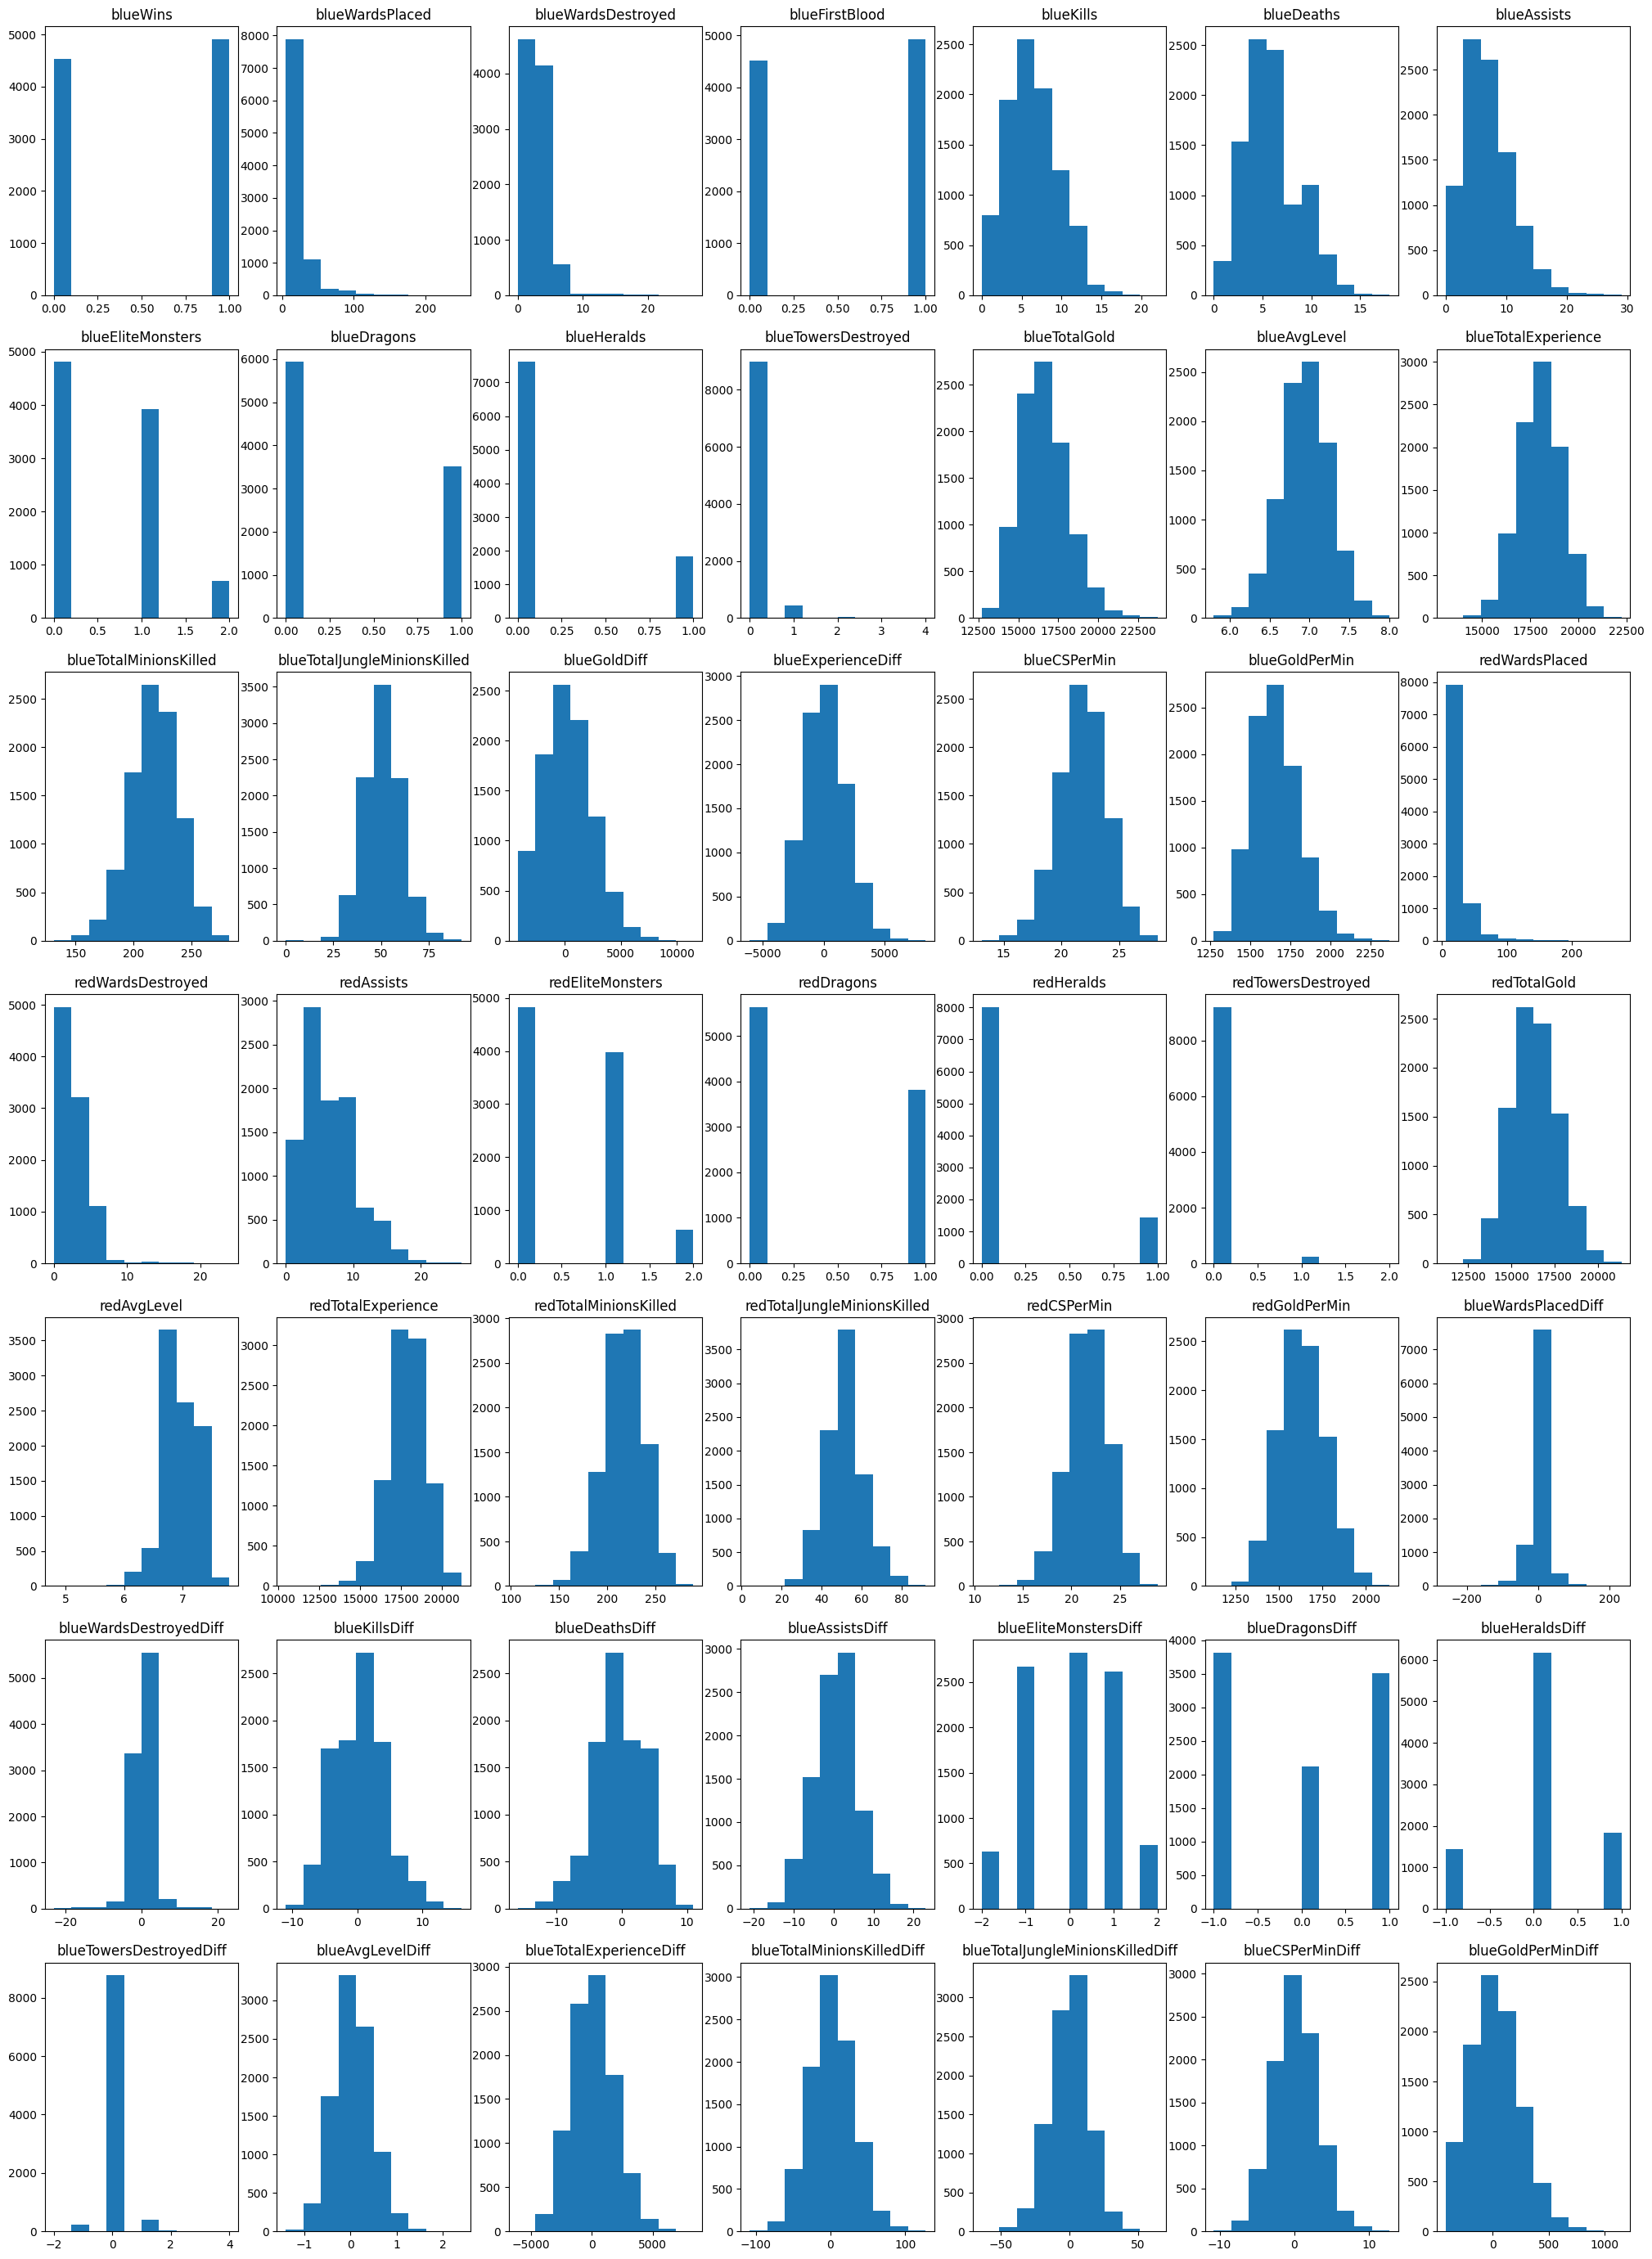

In [13]:
plt.figure(figsize=(25, 35))
for idx, col in enumerate(list(dataset_df.columns)):
    plt.subplot(7, 7, idx+1)
    plt.title(col)
    plt.hist(data_df[col])

Split data and normalization

In [14]:
target = np.array(data_df['blueWins'])
data_df = data_df.drop(columns=['blueWins'])
features = np.array(data_df)
features = (features - features.min()) / (features.max() - features.min())

In [101]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7553, 48), (1889, 48), (7553,), (1889,))

Creating Random Forests from sklearn with gridsearch

In [68]:
params = {
          'n_estimators':[10, 20, 50, 100, 500, 1000],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [3, 5, 7, 9, 11, 13],
          'min_samples_leaf': [2, 4, 6, 8, 10],
          'random_state': [42],
          'bootstrap': [True]
        }

In [69]:
rfc1 = RandomForestClassifier()
sk_grid_f1 = GridSearchCV(rfc1, n_jobs=-1, param_grid=params, cv=5, refit=True, verbose=1, scoring='f1')
sk_grid_f1.fit(X_train, y_train)
print(sk_grid_f1.best_estimator_, sk_grid_f1.best_params_, sk_grid_f1.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


RandomForestClassifier(max_depth=7, min_samples_leaf=6, random_state=42) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'n_estimators': 100, 'random_state': 42} 0.734808146926501


In [93]:
rfskl1 = RandomForestClassifier(bootstrap=True, criterion='gini',max_depth=7, min_samples_leaf=6, n_estimators=100, random_state=42)
rfskl1.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=6, random_state=42)

In [70]:
rfc2 = RandomForestClassifier()
sk_grid_auc = GridSearchCV(rfc2, n_jobs=-1, param_grid=params, cv=5, refit=True, verbose=1, scoring='roc_auc')
sk_grid_auc.fit(X_train, y_train)
print(sk_grid_auc.best_estimator_, sk_grid_auc.best_params_, sk_grid_auc.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       n_estimators=500, random_state=42) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 500, 'random_state': 42} 0.7964929443745763


In [94]:
rfskl2 = RandomForestClassifier(bootstrap=True, criterion='entropy',max_depth=7, min_samples_leaf=4, n_estimators=500, random_state=42)
rfskl2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       n_estimators=500, random_state=42)

In [71]:
rfc3 = RandomForestClassifier()
sk_grid_accuracy = GridSearchCV(rfc3, n_jobs=-1, param_grid=params, cv=5, refit=True, verbose=0, scoring='accuracy')
sk_grid_accuracy.fit(X_train, y_train)
print(sk_grid_accuracy.best_estimator_, sk_grid_accuracy.best_params_, sk_grid_accuracy.best_score_)

RandomForestClassifier(max_depth=7, min_samples_leaf=6, random_state=42) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'n_estimators': 100, 'random_state': 42} 0.722230880825382


In [95]:
rfskl3 = RandomForestClassifier(bootstrap=True, criterion='gini',max_depth=7, min_samples_leaf=6, n_estimators=100, random_state=42)
rfskl3.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=6, random_state=42)

Creating Random Forests with XGBoost and gridsearch

In [52]:
params = {
  'colsample_bynode': [0.8, 0.6, 0.5],
  'learning_rate': [1, 0.8, 0.6, 0.35, 0.1],
  'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
  'num_parallel_tree': [5, 10, 15],
  'n_estimators': [5, 10, 50, 100, 250, 500, 1000],
  'objective': ['binary:logistic'],
  'subsample': [0.8]
}

In [53]:
xgb_f1 = xgb.XGBRFClassifier()
grid_f1 = GridSearchCV(xgb_f1, n_jobs=-1, param_grid=params, cv=5, refit=True, verbose=0, scoring='f1')
grid_f1.fit(X_train, y_train)
print(grid_f1.best_estimator_, grid_f1.best_params_, grid_f1.best_score_)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=0.5,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=500, n_jobs=None, num_parallel_tree=5,
                objective='binary:logistic', predictor=None, ...) {'colsample_bynode': 0.5, 'learning_rate': 1, 'max_depth': 5, 'n_estimators': 500, 'num_parallel_tree': 5, 'objective': 'binary:logistic', 'subsample': 0.8} 0.7337336226131852


In [97]:
xgb1 = xgb.XGBRFClassifier(colsample_bynode=0.5, learning_rate=1, max_depth=5, n_estimators=500, num_parallel_tree=5, objective='binary:logistic', subsample=0.8)
xgb1.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=0.5,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=500, n_jobs=None, num_parallel_tree=5,
                objective='binary:logistic', predictor=None, ...)

In [54]:
xgb_auc = xgb.XGBRFClassifier()
grid_auc = GridSearchCV(xgb_f1, n_jobs=-1, param_grid=params, cv=5, refit=True, verbose=0, scoring='roc_auc')
grid_auc.fit(X_train, y_train)
print(grid_auc.best_estimator_, grid_auc.best_params_, grid_auc.best_score_)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=0.5,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.6, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=1000, n_jobs=None, num_parallel_tree=5,
                objective='binary:logistic', predictor=None, ...) {'colsample_bynode': 0.5, 'learning_rate': 0.6, 'max_depth': 5, 'n_estimators': 1000, 'num_parallel_tree': 5, 'objective': 'binary:logistic', 'subsample': 0.8} 0.7961928389757796


In [98]:
xgb2 = xgb.XGBRFClassifier(colsample_bynode=0.5, learning_rate=0.6, max_depth=5, n_estimators=1000, num_parallel_tree=5, objective='binary:logistic', subsample=0.8)
xgb2.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=0.5,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.6, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=1000, n_jobs=None, num_parallel_tree=5,
                objective='binary:logistic', predictor=None, ...)

In [55]:
xgb_accuracy = xgb.XGBRFClassifier()
grid_accuracy = GridSearchCV(xgb_f1, n_jobs=-1, param_grid=params, cv=5, refit=True, verbose=0, scoring='accuracy')
grid_accuracy.fit(X_train, y_train)
print(grid_accuracy.best_estimator_, grid_accuracy.best_params_, grid_accuracy.best_score_)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=0.5,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=6, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=1000, n_jobs=None, num_parallel_tree=5,
                objective='binary:logistic', predictor=None, ...) {'colsample_bynode': 0.5, 'learning_rate': 1, 'max_depth': 6, 'n_estimators': 1000, 'num_parallel_tree': 5, 'objective': 'binary:logistic', 'subsample': 0.8} 0.7201124644439671


In [99]:
xgb3 = xgb.XGBRFClassifier(colsample_bynode=0.5, learning_rate=0.6, max_depth=6, n_estimators=1000, num_parallel_tree=5, objective='binary:logistic', subsample=0.8)
xgb3.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=0.5,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.6, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=6, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=1000, n_jobs=None, num_parallel_tree=5,
                objective='binary:logistic', predictor=None, ...)

Creating neural networks

In [60]:
nn1 = keras.Sequential()
nn1.add(keras.layers.Dense(512, activation='relu'))
nn1.add(keras.layers.BatchNormalization(momentum=0.9))
nn1.add(keras.layers.Dropout(0.35))
nn1.add(keras.layers.Dense(512, activation='relu'))
nn1.add(keras.layers.BatchNormalization(momentum=0.9))
nn1.add(keras.layers.Dropout(0.35))
nn1.add(keras.layers.Dense(512, activation='relu'))
nn1.add(keras.layers.BatchNormalization(momentum=0.9))
nn1.add(keras.layers.Dropout(0.35))
nn1.add(keras.layers.Dense(1, activation='sigmoid'))

nn1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])
nn1.fit(X_train, y_train, batch_size=16, epochs=25, validation_split=0.2, shuffle=True)

Epoch 1/25
378/378 [==============================] - 4s 8ms/step - loss: 0.7135 - auc: 0.7172 - accuracy: 0.6607 - val_loss: 0.7906 - val_auc: 0.7936 - val_accuracy: 0.6618
Epoch 2/25
378/378 [==============================] - 3s 7ms/step - loss: 0.6182 - auc: 0.7458 - accuracy: 0.6829 - val_loss: 0.5644 - val_auc: 0.7908 - val_accuracy: 0.7134
Epoch 3/25
378/378 [==============================] - 2s 6ms/step - loss: 0.5931 - auc: 0.7569 - accuracy: 0.6905 - val_loss: 0.5931 - val_auc: 0.7693 - val_accuracy: 0.6711
Epoch 4/25
378/378 [==============================] - 2s 6ms/step - loss: 0.5885 - auc: 0.7630 - accuracy: 0.6893 - val_loss: 0.5509 - val_auc: 0.7985 - val_accuracy: 0.7220
Epoch 5/25
378/378 [==============================] - 2s 6ms/step - loss: 0.5781 - auc: 0.7705 - accuracy: 0.7009 - val_loss: 0.5695 - val_auc: 0.7989 - val_accuracy: 0.7181
Epoch 6/25
378/378 [==============================] - 2s 7ms/step - loss: 0.5770 - auc: 0.7701 - accuracy: 0.6993 - val_loss: 0.56

In [61]:
nn2 = keras.Sequential()
nn2.add(keras.layers.Dense(512, activation='relu'))
nn2.add(keras.layers.BatchNormalization(momentum=0.9))
nn2.add(keras.layers.Dropout(0.35))
nn2.add(keras.layers.Dense(512, activation='relu'))
nn2.add(keras.layers.BatchNormalization(momentum=0.9))
nn2.add(keras.layers.Dropout(0.35))
nn2.add(keras.layers.Dense(512, activation='relu'))
nn2.add(keras.layers.BatchNormalization(momentum=0.9))
nn2.add(keras.layers.Dropout(0.35))
nn2.add(keras.layers.Dense(1, activation='sigmoid'))

nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])
nn2.fit(X_train, y_train, batch_size=16, epochs=25, validation_split=0.2, shuffle=True)

Epoch 1/25
378/378 [==============================] - 5s 8ms/step - loss: 0.7010 - auc: 0.7189 - accuracy: 0.6587 - val_loss: 0.5948 - val_auc: 0.7935 - val_accuracy: 0.7201
Epoch 2/25
378/378 [==============================] - 3s 7ms/step - loss: 0.6228 - auc: 0.7403 - accuracy: 0.6730 - val_loss: 0.5696 - val_auc: 0.7884 - val_accuracy: 0.6883
Epoch 3/25
378/378 [==============================] - 3s 7ms/step - loss: 0.5948 - auc: 0.7596 - accuracy: 0.6968 - val_loss: 0.5532 - val_auc: 0.7958 - val_accuracy: 0.7267
Epoch 4/25
378/378 [==============================] - 3s 8ms/step - loss: 0.5865 - auc: 0.7609 - accuracy: 0.6898 - val_loss: 0.5601 - val_auc: 0.7940 - val_accuracy: 0.7306
Epoch 5/25
378/378 [==============================] - 3s 7ms/step - loss: 0.5816 - auc: 0.7665 - accuracy: 0.6975 - val_loss: 0.5516 - val_auc: 0.7984 - val_accuracy: 0.7201
Epoch 6/25
378/378 [==============================] - 2s 6ms/step - loss: 0.5817 - auc: 0.7646 - accuracy: 0.6913 - val_loss: 0.58

In [62]:
nn3 = keras.Sequential()
nn3.add(keras.layers.Dense(512, activation='sigmoid'))
nn3.add(keras.layers.BatchNormalization(momentum=0.9))
nn3.add(keras.layers.Dropout(0.35))
nn3.add(keras.layers.Dense(512, activation='sigmoid'))
nn3.add(keras.layers.BatchNormalization(momentum=0.9))
nn3.add(keras.layers.Dropout(0.35))
nn3.add(keras.layers.Dense(512, activation='sigmoid'))
nn3.add(keras.layers.BatchNormalization(momentum=0.9))
nn3.add(keras.layers.Dropout(0.35))
nn3.add(keras.layers.Dense(1, activation='sigmoid'))

nn3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])
nn3.fit(X_train, y_train, batch_size=16, epochs=25, validation_split=0.2, shuffle=True)

Epoch 1/25
378/378 [==============================] - 4s 7ms/step - loss: 0.6962 - auc: 0.7171 - accuracy: 0.6599 - val_loss: 0.5834 - val_auc: 0.7585 - val_accuracy: 0.7214
Epoch 2/25
378/378 [==============================] - 3s 7ms/step - loss: 0.6239 - auc: 0.7393 - accuracy: 0.6814 - val_loss: 0.5803 - val_auc: 0.7944 - val_accuracy: 0.7154
Epoch 3/25
378/378 [==============================] - 2s 6ms/step - loss: 0.6132 - auc: 0.7432 - accuracy: 0.6882 - val_loss: 0.5914 - val_auc: 0.7848 - val_accuracy: 0.7148
Epoch 4/25
378/378 [==============================] - 3s 7ms/step - loss: 0.6042 - auc: 0.7482 - accuracy: 0.6839 - val_loss: 0.5776 - val_auc: 0.8003 - val_accuracy: 0.7009
Epoch 5/25
378/378 [==============================] - 3s 7ms/step - loss: 0.5971 - auc: 0.7512 - accuracy: 0.6840 - val_loss: 0.5461 - val_auc: 0.7985 - val_accuracy: 0.7287
Epoch 6/25
378/378 [==============================] - 2s 7ms/step - loss: 0.5950 - auc: 0.7551 - accuracy: 0.6923 - val_loss: 0.59

In [63]:
nn4 = keras.Sequential()
nn4.add(keras.layers.Dense(512, activation='sigmoid'))
nn4.add(keras.layers.BatchNormalization(momentum=0.9))
nn4.add(keras.layers.Dropout(0.35))
nn4.add(keras.layers.Dense(512, activation='sigmoid'))
nn4.add(keras.layers.BatchNormalization(momentum=0.9))
nn4.add(keras.layers.Dropout(0.35))
nn4.add(keras.layers.Dense(512, activation='sigmoid'))
nn4.add(keras.layers.BatchNormalization(momentum=0.9))
nn4.add(keras.layers.Dropout(0.35))
nn4.add(keras.layers.Dense(1, activation='sigmoid'))

nn4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])
nn4.fit(X_train, y_train, batch_size=16, epochs=25, validation_split=0.2, shuffle=True)

Epoch 1/25
378/378 [==============================] - 5s 8ms/step - loss: 0.6800 - auc: 0.7217 - accuracy: 0.6642 - val_loss: 0.5706 - val_auc: 0.7808 - val_accuracy: 0.7088
Epoch 2/25
378/378 [==============================] - 2s 6ms/step - loss: 0.6212 - auc: 0.7420 - accuracy: 0.6791 - val_loss: 0.6735 - val_auc: 0.7405 - val_accuracy: 0.6578
Epoch 3/25
378/378 [==============================] - 3s 8ms/step - loss: 0.5988 - auc: 0.7547 - accuracy: 0.6854 - val_loss: 0.5764 - val_auc: 0.7940 - val_accuracy: 0.6956
Epoch 4/25
378/378 [==============================] - 3s 7ms/step - loss: 0.5999 - auc: 0.7536 - accuracy: 0.6933 - val_loss: 0.5881 - val_auc: 0.7960 - val_accuracy: 0.6830
Epoch 5/25
378/378 [==============================] - 3s 7ms/step - loss: 0.5916 - auc: 0.7578 - accuracy: 0.6943 - val_loss: 0.5507 - val_auc: 0.7937 - val_accuracy: 0.7287
Epoch 6/25
378/378 [==============================] - 3s 7ms/step - loss: 0.5850 - auc: 0.7627 - accuracy: 0.6993 - val_loss: 0.56

In [64]:
nn5 = keras.Sequential()
nn5.add(keras.layers.Dense(1024, activation='relu'))
nn5.add(keras.layers.BatchNormalization(momentum=0.9))
nn5.add(keras.layers.Dropout(0.45))
nn5.add(keras.layers.Dense(1024, activation='relu'))
nn5.add(keras.layers.BatchNormalization(momentum=0.9))
nn5.add(keras.layers.Dropout(0.45))
nn5.add(keras.layers.Dense(1024, activation='relu'))
nn5.add(keras.layers.BatchNormalization(momentum=0.9))
nn5.add(keras.layers.Dropout(0.45))
nn5.add(keras.layers.Dense(1024, activation='relu'))
nn5.add(keras.layers.BatchNormalization(momentum=0.9))
nn5.add(keras.layers.Dropout(0.45))
nn5.add(keras.layers.Dense(1024, activation='relu'))
nn5.add(keras.layers.BatchNormalization(momentum=0.9))
nn5.add(keras.layers.Dropout(0.45))
nn5.add(keras.layers.Dense(1, activation='sigmoid'))

nn5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])
nn5.fit(X_train, y_train, batch_size=16, epochs=25, validation_split=0.2, shuffle=True)

Epoch 1/25
378/378 [==============================] - 16s 37ms/step - loss: 0.8026 - auc: 0.6997 - accuracy: 0.6423 - val_loss: 0.5866 - val_auc: 0.7861 - val_accuracy: 0.6929
Epoch 2/25
378/378 [==============================] - 11s 29ms/step - loss: 0.6301 - auc: 0.7431 - accuracy: 0.6799 - val_loss: 0.6447 - val_auc: 0.7978 - val_accuracy: 0.7406
Epoch 3/25
378/378 [==============================] - 11s 30ms/step - loss: 0.6103 - auc: 0.7494 - accuracy: 0.6835 - val_loss: 0.5704 - val_auc: 0.8001 - val_accuracy: 0.7326
Epoch 4/25
378/378 [==============================] - 11s 30ms/step - loss: 0.6082 - auc: 0.7495 - accuracy: 0.6816 - val_loss: 0.5563 - val_auc: 0.8009 - val_accuracy: 0.7300
Epoch 5/25
378/378 [==============================] - 14s 36ms/step - loss: 0.6035 - auc: 0.7573 - accuracy: 0.6951 - val_loss: 0.5819 - val_auc: 0.7370 - val_accuracy: 0.7167
Epoch 6/25
378/378 [==============================] - 13s 34ms/step - loss: 0.5983 - auc: 0.7562 - accuracy: 0.6859 - va

In [65]:
nn6 = keras.Sequential()
nn6.add(keras.layers.Dense(1024, activation='relu'))
nn6.add(keras.layers.BatchNormalization(momentum=0.9))
nn6.add(keras.layers.Dropout(0.45))
nn6.add(keras.layers.Dense(1024, activation='relu'))
nn6.add(keras.layers.BatchNormalization(momentum=0.9))
nn6.add(keras.layers.Dropout(0.45))
nn6.add(keras.layers.Dense(1024, activation='relu'))
nn6.add(keras.layers.BatchNormalization(momentum=0.9))
nn6.add(keras.layers.Dropout(0.45))
nn6.add(keras.layers.Dense(1024, activation='relu'))
nn6.add(keras.layers.BatchNormalization(momentum=0.9))
nn6.add(keras.layers.Dropout(0.45))
nn6.add(keras.layers.Dense(1024, activation='relu'))
nn6.add(keras.layers.BatchNormalization(momentum=0.9))
nn6.add(keras.layers.Dropout(0.45))
nn6.add(keras.layers.Dense(1, activation='sigmoid'))

nn6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])
nn6.fit(X_train, y_train, batch_size=16, epochs=25, validation_split=0.2, shuffle=True)

Epoch 1/25
378/378 [==============================] - 19s 43ms/step - loss: 0.7703 - auc: 0.7051 - accuracy: 0.6538 - val_loss: 0.5668 - val_auc: 0.7910 - val_accuracy: 0.7154
Epoch 2/25
378/378 [==============================] - 16s 43ms/step - loss: 0.6273 - auc: 0.7403 - accuracy: 0.6748 - val_loss: 0.5863 - val_auc: 0.7498 - val_accuracy: 0.6797
Epoch 3/25
378/378 [==============================] - 14s 38ms/step - loss: 0.6122 - auc: 0.7444 - accuracy: 0.6787 - val_loss: 0.5676 - val_auc: 0.7965 - val_accuracy: 0.7154
Epoch 4/25
378/378 [==============================] - 14s 38ms/step - loss: 0.6080 - auc: 0.7451 - accuracy: 0.6773 - val_loss: 0.5709 - val_auc: 0.7976 - val_accuracy: 0.7260
Epoch 5/25
378/378 [==============================] - 14s 38ms/step - loss: 0.5941 - auc: 0.7579 - accuracy: 0.6870 - val_loss: 0.5763 - val_auc: 0.7937 - val_accuracy: 0.7148
Epoch 6/25
378/378 [==============================] - 15s 39ms/step - loss: 0.5954 - auc: 0.7572 - accuracy: 0.6918 - va

In [66]:
nn7 = keras.Sequential()
nn7.add(keras.layers.Dense(1024, activation='sigmoid'))
nn7.add(keras.layers.BatchNormalization(momentum=0.9))
nn7.add(keras.layers.Dropout(0.45))
nn7.add(keras.layers.Dense(1024, activation='sigmoid'))
nn7.add(keras.layers.BatchNormalization(momentum=0.9))
nn7.add(keras.layers.Dropout(0.45))
nn7.add(keras.layers.Dense(1024, activation='sigmoid'))
nn7.add(keras.layers.BatchNormalization(momentum=0.9))
nn7.add(keras.layers.Dropout(0.45))
nn7.add(keras.layers.Dense(1024, activation='sigmoid'))
nn7.add(keras.layers.BatchNormalization(momentum=0.9))
nn7.add(keras.layers.Dropout(0.45))
nn7.add(keras.layers.Dense(1024, activation='sigmoid'))
nn7.add(keras.layers.BatchNormalization(momentum=0.9))
nn7.add(keras.layers.Dropout(0.45))
nn7.add(keras.layers.Dense(1, activation='sigmoid'))

nn7.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])
nn7.fit(X_train, y_train, batch_size=16, epochs=25, validation_split=0.2, shuffle=True)

Epoch 1/25
378/378 [==============================] - 14s 31ms/step - loss: 0.8477 - auc: 0.6757 - accuracy: 0.6430 - val_loss: 0.6037 - val_auc: 0.7776 - val_accuracy: 0.7366
Epoch 2/25
378/378 [==============================] - 10s 26ms/step - loss: 0.6847 - auc: 0.6993 - accuracy: 0.6567 - val_loss: 0.5721 - val_auc: 0.7887 - val_accuracy: 0.7379
Epoch 3/25
378/378 [==============================] - 11s 29ms/step - loss: 0.6659 - auc: 0.7040 - accuracy: 0.6634 - val_loss: 0.6004 - val_auc: 0.7932 - val_accuracy: 0.7359
Epoch 4/25
378/378 [==============================] - 11s 28ms/step - loss: 0.6374 - auc: 0.7226 - accuracy: 0.6774 - val_loss: 0.6093 - val_auc: 0.7703 - val_accuracy: 0.6949
Epoch 5/25
378/378 [==============================] - 10s 27ms/step - loss: 0.6412 - auc: 0.7165 - accuracy: 0.6698 - val_loss: 0.6063 - val_auc: 0.7857 - val_accuracy: 0.6797
Epoch 6/25
378/378 [==============================] - 10s 27ms/step - loss: 0.6320 - auc: 0.7253 - accuracy: 0.6834 - va

In [67]:
nn8 = keras.Sequential()
nn8.add(keras.layers.Dense(1024, activation='sigmoid'))
nn8.add(keras.layers.BatchNormalization(momentum=0.9))
nn8.add(keras.layers.Dropout(0.45))
nn8.add(keras.layers.Dense(1024, activation='sigmoid'))
nn8.add(keras.layers.BatchNormalization(momentum=0.9))
nn8.add(keras.layers.Dropout(0.45))
nn8.add(keras.layers.Dense(1024, activation='sigmoid'))
nn8.add(keras.layers.BatchNormalization(momentum=0.9))
nn8.add(keras.layers.Dropout(0.45))
nn8.add(keras.layers.Dense(1024, activation='sigmoid'))
nn8.add(keras.layers.BatchNormalization(momentum=0.9))
nn8.add(keras.layers.Dropout(0.45))
nn8.add(keras.layers.Dense(1024, activation='sigmoid'))
nn8.add(keras.layers.BatchNormalization(momentum=0.9))
nn8.add(keras.layers.Dropout(0.45))
nn8.add(keras.layers.Dense(1, activation='sigmoid'))

nn8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC', 'accuracy'])
nn8.fit(X_train, y_train, batch_size=16, epochs=25, validation_split=0.2, shuffle=True)

Epoch 1/25
378/378 [==============================] - 22s 51ms/step - loss: 0.7823 - auc: 0.6908 - accuracy: 0.6513 - val_loss: 0.7549 - val_auc: 0.7972 - val_accuracy: 0.7214
Epoch 2/25
378/378 [==============================] - 18s 47ms/step - loss: 0.6613 - auc: 0.7095 - accuracy: 0.6706 - val_loss: 0.5752 - val_auc: 0.7764 - val_accuracy: 0.7128
Epoch 3/25
378/378 [==============================] - 18s 48ms/step - loss: 0.6366 - auc: 0.7218 - accuracy: 0.6824 - val_loss: 0.5540 - val_auc: 0.7961 - val_accuracy: 0.7340
Epoch 4/25
378/378 [==============================] - 18s 47ms/step - loss: 0.6212 - auc: 0.7321 - accuracy: 0.6895 - val_loss: 0.6661 - val_auc: 0.6752 - val_accuracy: 0.6545
Epoch 5/25
378/378 [==============================] - 18s 49ms/step - loss: 0.6279 - auc: 0.7215 - accuracy: 0.6880 - val_loss: 0.5588 - val_auc: 0.7939 - val_accuracy: 0.7201
Epoch 6/25
378/378 [==============================] - 19s 51ms/step - loss: 0.6245 - auc: 0.7268 - accuracy: 0.6816 - va

In [104]:
models = [rfskl1, rfskl2, rfskl3, xgb1, xgb2, xgb3, nn1, nn2, nn3, nn4, nn5, nn6, nn7, nn8]
accuracies_per_class = [[0, 0] for _ in models]

for idx, model in enumerate(models):
    confusion_matrix = [[0,0],[0,0]]
    for res, pred in zip(y_test, model.predict(X_test)):
        if pred > 0.5:
            pred = 1
        else:
            pred = 0
        confusion_matrix[res][pred] += 1

    accuracies_per_class[idx][0] = round(confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1]), 2)
    accuracies_per_class[idx][1] = round(confusion_matrix[1][1]/(confusion_matrix[1][0] + confusion_matrix[1][1]), 2)
        

60/60 [==============================] - 0s 6ms/step


In [105]:
accuracies_per_class

[[0.73, 0.75],
 [0.72, 0.75],
 [0.73, 0.75],
 [0.72, 0.73],
 [0.71, 0.74],
 [0.72, 0.74],
 [0.61, 0.8],
 [0.74, 0.68],
 [0.74, 0.67],
 [0.46, 0.87],
 [0.72, 0.69],
 [0.7, 0.73],
 [0.69, 0.71],
 [0.55, 0.83]]

In [135]:
preds = [[0, 0] for _ in X_test]
for idx_model, model in enumerate(models):
    for idx, pred in enumerate(model.predict(X_test)):
        if pred > 0.5:
            preds[idx][1] += accuracies_per_class[idx_model][0]
        else:
            preds[idx][0] += accuracies_per_class[idx_model][1]

print(preds)

60/60 [==============================] - 0s 5ms/step
[[10.44, 0], [7.94, 1.62], [10.44, 0], [0.67, 8.8], [0, 9.54], [10.44, 0], [0.67, 8.8], [2.17, 7.339999999999999], [10.44, 0], [0, 9.54], [0, 9.54], [0, 9.54], [8.739999999999998, 1.01], [0, 9.54], [10.44, 0], [0, 9.54], [9.569999999999999, 0.46], [10.44, 0], [0, 9.54], [0, 9.54], [7.94, 1.62], [1.47, 8.1], [10.44, 0], [7.2700000000000005, 2.3600000000000003], [10.44, 0], [0, 9.54], [0, 9.54], [3.58, 5.929999999999999], [10.44, 0], [0, 9.54], [10.44, 0], [10.44, 0], [0, 9.54], [0, 9.54], [9.569999999999999, 0.46], [10.44, 0], [0, 9.54], [3.48, 5.949999999999999], [10.44, 0], [0, 9.54], [10.44, 0], [0, 9.54], [0, 9.54], [10.44, 0], [3.6, 5.959999999999999], [7.23, 2.31], [0, 9.54], [10.44, 0], [3.48, 5.949999999999999], [0, 9.54], [0, 9.54], [0, 9.54], [10.44, 0], [0, 9.54], [3.48, 5.949999999999999], [0, 9.54], [0, 9.54], [5.76, 3.7199999999999998], [0, 9.54], [1.38, 8.11], [0, 9.54], [0, 9.54], [0, 9.54], [10.44, 0], [3.63, 5.929999

In [137]:
final_predictions = []
for pred in preds:
    final_predictions.append(np.argmax(pred))

accuracy_final = 0
for pred, res in zip(final_predictions, y_test):
    if pred == res:
        accuracy_final += 1
accuracy_final = accuracy_final/len(y_test)

accuracy_final

0.7289571201694018